# Data Story: Meal Delivery in Multiple Cities

A meal delivery company operates across multiple cities, managing several fulfillment centers in these areas to efficiently dispatch meal orders to customers. The company is keen on gaining deeper insights into its order dynamics:
- Identify any outliers in the data that may require further investigation?
- The most popular meals and centers based on the number of orders?
- How do checkout prices compare to base prices?
- What are the customers' ordering preferences in cuisine type and meal category?
- Are there any significant differences in ordering behavior based on the type of center?
- What is the impact of email promotions and homepage features on order quantities?
- How do different regions and cities contribute to overall order volume?
- Are there any seasonal trends or patterns in meal orders?
- How does the operational area (op_area) of fulfillment centers correlate with order quantities ?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from library.sb_utils import save_file

#### Load the data


In [6]:
# Load the data contains orders, fulfilment centers, and meal info
food_orders = pd.read_csv('../Data/food_data_merged.csv')

In [7]:
#use the info method to see a summary of the data
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  center_type            423727 non-null  object 
 12  op_area                423727 non-null  float64
 13  meal_category          423727 non-null  object 
 14  cuisine                423727 non-nu

In [4]:
#use the head method to see the first several rows of the data
food_orders.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,meal_category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1044078,1,39,2290,301.73,299.73,0,0,419,526,34,TYPE_C,3.8,Rice Bowl,Indian
2,1272063,1,65,2290,305.58,306.58,0,0,878,602,34,TYPE_A,4.8,Rice Bowl,Indian
3,1364972,1,43,2290,279.39,279.39,0,0,944,590,56,TYPE_A,5.1,Rice Bowl,Indian
4,1363806,1,80,2290,311.43,311.43,0,0,446,604,56,TYPE_C,5.1,Rice Bowl,Indian


### Explore the Data

### 1- Check for Missing Data

In [17]:
# check if there is any missing values
food_orders.isna().sum().sort_values(ascending=False)

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
meal_category            0
cuisine                  0
dtype: int64

There is no missing data in the dataset.

In [18]:
#Perform summary statistics on numeric features
food_orders.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.237270e+05,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000
mean,1.249964e+06,69.677332,82.109469,2023.956295,331.526166,353.732761,0.083353,0.111315,264.550536,601.562478,56.609468,4.083245
std,1.443431e+05,38.686607,45.977420,547.370379,153.085823,160.919513,0.276416,0.314522,403.573030,66.206777,17.641225,1.091407
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124878e+06,37.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249955e+06,70.000000,76.000000,1971.000000,292.030000,309.490000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.374949e+06,103.000000,110.000000,2539.000000,444.290000,458.870000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,135.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


### 2-Distribution of feature values

- ### Identify any outliers in the data that may require further investigation?

Looking at distributions of features to get a feel for whether the values look sensible and whether there are any obvious outliers to investigate.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'week'}>,
        <AxesSubplot:title={'center':'center_id'}>],
       [<AxesSubplot:title={'center':'meal_id'}>,
        <AxesSubplot:title={'center':'checkout_price'}>,
        <AxesSubplot:title={'center':'base_price'}>],
       [<AxesSubplot:title={'center':'emailer_for_promotion'}>,
        <AxesSubplot:title={'center':'homepage_featured'}>,
        <AxesSubplot:title={'center':'num_orders'}>],
       [<AxesSubplot:title={'center':'city_code'}>,
        <AxesSubplot:title={'center':'region_code'}>,
        <AxesSubplot:title={'center':'op_area'}>]], dtype=object)

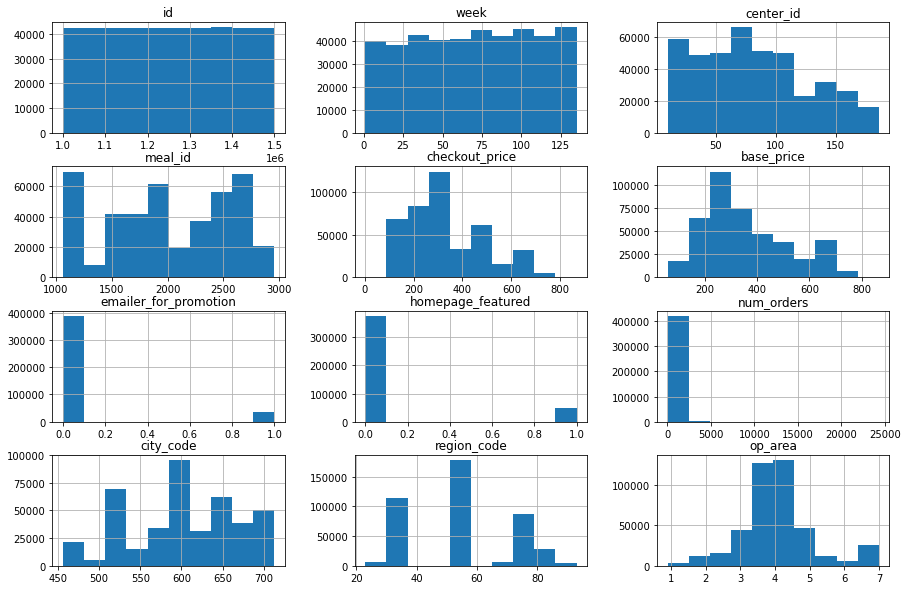

In [19]:
#Use hist method to plot histograms of each of numeric features
food_orders.hist(figsize=(15,10))

The only concern is the 'num_orders' variable because while most values are low, it has a maximum of 24,299. This could be an outlier, or it might represent a special week with an unusually high number of orders for a specific meal.

In [20]:
# investigate num_orders values
# filter 'num_orders' column to print the values greater than 10,000
high_demand=food_orders[food_orders.num_orders>10000].sort_values('num_orders')

In [21]:
high_demand.shape

(22, 15)

In [22]:
high_demand['week'].value_counts()

week
5      12
132     2
68      1
38      1
83      1
70      1
30      1
32      1
6       1
7       1
Name: count, dtype: int64

In [23]:
high_demand['meal_category'].value_counts()

meal_category
Rice Bowl    16
Sandwich      6
Name: count, dtype: int64

In [24]:
high_demand[((high_demand['emailer_for_promotion']==1) | (high_demand['homepage_featured']==1))].count()

id                       22
week                     22
center_id                22
meal_id                  22
checkout_price           22
base_price               22
emailer_for_promotion    22
homepage_featured        22
num_orders               22
city_code                22
region_code              22
center_type              22
op_area                  22
meal_category            22
cuisine                  22
dtype: int64

There are 22 rows of data with more than 10,000 orders, most of which are in week 5, mostly for 'Rice Bowl' and some sandwiches. All of these orders are associated with email promotions or homepage features.

There is only one row of data with more than 16,000 orders (24,299), also occurring in week 5 and associated with 'Rice Bowl'. 
There is no sign of outliers. It could be attributed to special events or promotions during this week.

#### Number of Unique Values in Features

In [25]:
#Estimate number of unique values for some features
meals=food_orders.meal_id.unique().size
centers=food_orders.center_id.unique().size
city=food_orders.city_code.unique().size
region=food_orders.region_code.unique().size
centerType=food_orders.center_type.unique().size
meal_cat=food_orders.meal_category.unique().size
cuisine=food_orders.cuisine.unique().size

print(f'center={centers}, meal={meals}, city= {city}, region= {region}, center_Type= {centerType}, meal_cat= {meal_cat}, cuisine= {cuisine}')

center=77, meal=51, city= 51, region= 8, center_Type= 3, meal_cat= 14, cuisine= 4


### 2-Feature Engineering

Add a column 'year' and 'week_year' to the data

In [41]:
food_orders_cp=food_orders.copy()
#add a column 'year' to the data 
food_orders_cp['year']=1
#filling the 'year' column and adding a 'week_year' column by considering each year has 52 weeks
food_orders_cp['week']=food_orders['week']
food_orders_cp['week_in_year']=food_orders['week']

first_year_weeks= food_orders_cp['week']<53
second_year_weeks=(food_orders_cp['week']>52) & (food_orders_cp['week']<105)
third_year_weeks=(food_orders['week']>104)

food_orders_cp.loc[first_year_weeks,'year']=1
food_orders_cp.loc[second_year_weeks,'year']=2
food_orders_cp.loc[third_year_weeks,'year']=3


food_orders_cp.loc[second_year_weeks,'week_in_year']=food_orders_cp['week']-52
food_orders_cp.loc[third_year_weeks,'week_in_year']=food_orders_cp['week']-104
food_orders_cp.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,meal_category,cuisine,year,week_in_year
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,1,1
1,1044078,1,39,2290,301.73,299.73,0,0,419,526,34,TYPE_C,3.8,Rice Bowl,Indian,1,1
2,1272063,1,65,2290,305.58,306.58,0,0,878,602,34,TYPE_A,4.8,Rice Bowl,Indian,1,1
3,1364972,1,43,2290,279.39,279.39,0,0,944,590,56,TYPE_A,5.1,Rice Bowl,Indian,1,1
4,1363806,1,80,2290,311.43,311.43,0,0,446,604,56,TYPE_C,5.1,Rice Bowl,Indian,1,1


In [31]:
# Save the data 

datapath = '../data'
save_file(food_orders_cp, 'food_data_merged_cp.csv', datapath)

Writing file.  "../data/food_data_merged_cp.csv"


In [59]:
orders_week=food_orders_cp.groupby(['week_in_year','year'])['num_orders'].sum().sort_values(ascending=False).reset_index()
orders_week.head()

,week_in_year,year,num_orders
0,48,1,1303457
1,5,1,1198675
2,8,2,1131459
3,1,2,1108236
4,48,2,1088162


In [43]:
#checking week 5 order numbers for the second year
food_orders_cp[(food_orders_cp['week_in_year']==5) & (food_orders_cp['year']==2)]['num_orders'].sum()

916721

As mentioned before, week 48 and week 5 have the highest number of orders, respectively.

Interestingly, the significance of these weeks appears to vary among years, as seen in the shift of Week 48 from the top position in the first year to the 5th place in the second year. Additionally, there is a shift of Week 5 from the second position in the first year to the 7th place in the third year.Also, Week 5 has the 27th place in the second year. 

The order counts exhibit fluctuations across different weeks, indicating potential seasonal patterns or external factors influencing customer behavior.

### 3-Explore total number of orders for some features

In [48]:
food_orders_cp.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,meal_category,cuisine,year,week_in_year
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,1,1
1,1044078,1,39,2290,301.73,299.73,0,0,419,526,34,TYPE_C,3.8,Rice Bowl,Indian,1,1
2,1272063,1,65,2290,305.58,306.58,0,0,878,602,34,TYPE_A,4.8,Rice Bowl,Indian,1,1
3,1364972,1,43,2290,279.39,279.39,0,0,944,590,56,TYPE_A,5.1,Rice Bowl,Indian,1,1
4,1363806,1,80,2290,311.43,311.43,0,0,446,604,56,TYPE_C,5.1,Rice Bowl,Indian,1,1


##### Define the following functions:
- Make barplot grouped by features
- Make barplot, grouped by feartures and 'yaer'
- Create Table summary and barplot for features (displaying the tnumber of orders, its ratio for each group)
- Create Table summary and barplot for features (displaying the number of orders, its ratio for each year and each group)
- Create Table summary and barplot for features (displaying the number of orders, and the cumulative sum of ratio for each year and each group)

In [49]:
# create func to make barplot grouped by features
def barplot(data, col):
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.barplot(x=col, y='num_orders',data=data ,order=data[col] )
    ax.set_title('num_orders vs %s'%col, fontsize=16, fontweight='bold')
    ax.set_xlabel(col,fontsize=14)
    ax.set_ylabel('num_orders', fontsize=14)
    ax.tick_params(labelrotation=45)

In [50]:
# create func to make barplot, grouped by feartures and 'yaer'
def barplot2(data, col):
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.barplot(x=col, y='num_orders',data=data,hue='year' ,order=data[col] )
    ax.set_title('num_orders vs %s'%col, fontsize=16, fontweight='bold')
    ax.set_xlabel(col,fontsize=14)
    ax.set_ylabel('num_orders', fontsize=14)
    ax.tick_params(labelrotation=45)

In [51]:
#Create a DataFrame summary and barplot for features, displaying the tnumber of orders, its ratio, and the cumulative sum for each group
def feature_target_summary(data,feature,plot=False):
    feature_data = data.groupby(feature)['num_orders'].sum().sort_values(ascending=False).reset_index()
    feature_data['Ratio_Perc']= 100 * (feature_data['num_orders']/feature_data['num_orders'].sum())
    feature_data['Ratio_Perc_cum']= feature_data['Ratio_Perc'].cumsum()
    if plot:
        plt.figure(figsize=(15,10))
        sns.barplot(x=feature, y='num_orders',data=feature_data ,order=feature_data[feature] )
        plt.title('num_orders vs %s'%feature, fontsize=16, fontweight='bold')
        plt.xlabel(feature,fontsize=14)
        plt.ylabel('num_orders', fontsize=14)
        plt.tick_params(labelrotation=45)
        
        for i in range(len(feature_data)):
            plt.annotate(
                str(round(feature_data['Ratio_Perc_cum'][i])),
                xy=(i, feature_data[feature][i] + feature_data['num_orders'][i] + 1),
                ha='center')
    return(feature_data)

In [52]:
#Create a DataFrame summary for features, displaying the number of orders, its ratio, and the cumulative sum of ratio for each year
#and each group
def feature_target_summary_year(data,feature,plot=False):
    feature_data = data.groupby([feature,'year'])['num_orders'].sum().reset_index()
    feature_data=feature_data.sort_values(by=['year','num_orders'],ascending=[True,False]).reset_index(drop=True)
    feature_data['Ratio_Perc_year']= feature_data.groupby('year')['num_orders'].transform(lambda x: 100 * x / x.sum())
    feature_data['Ratio_Perc_year_cum']= feature_data.groupby('year')['Ratio_Perc_year'].cumsum()
    #feature_data.loc[feature_data['year']==1]
    if plot:
        plt.figure(figsize=(20,10))
        bplot=sns.barplot(x=feature, y='num_orders',data=feature_data, hue='year' ,order=feature_data[feature] )
        plt.title('num_orders vs %s'%feature, fontsize=16, fontweight='bold')
        plt.xlabel(feature,fontsize=14)
        plt.ylabel('num_orders', fontsize=14)
        plt.tick_params(labelrotation=45)
        # Annotate with the values from the 'Ratio_Perc_year' column
   # for i in range(len(feature_data)):
       # plt.text(i, feature_data[feature][i] + feature_data['num_orders'][i] + 1, str(round(feature_data['Ratio_Perc_year_cum'][i])))
        #plt.annotate(str(round(feature_data['Ratio_Perc_year_cum'][i])), xy=( i, feature_data[feature][i] + feature_data['num_orders'][i] + 1),ha='center', color=feature_data['year'][i])
        txt = []
        for i in feature_data['year'].unique():
            tmp = round(feature_data[feature_data['year'] == i]['Ratio_Perc_year'])
            txt.append(tmp.tolist())

        txt = sum(txt,[])

        for t,b,idx in zip(txt, bplot.patches, feature_data.index):

            # Convert to integer for display
            t_int = int(t)
            
            bplot.annotate(t_int,
                           (b.get_x() + b.get_width() / 2., b.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 5),
                           textcoords = 'offset points')
    return(feature_data)

In [54]:
#Create a DataFrame summary for features, displaying the number of orders, its ratio, and the cumulative sum of ratio for each year
#and each group
def feature_target_summary_cum_year(data,feature,plot=False):
    feature_data = data.groupby([feature,'year'])['num_orders'].sum().reset_index()
    feature_data=feature_data.sort_values(by=['year','num_orders'],ascending=[True,False]).reset_index(drop=True)
    feature_data['Ratio_Perc_year']= feature_data.groupby('year')['num_orders'].transform(lambda x: 100 * x / x.sum())
    feature_data['Ratio_Perc_year_cum']= feature_data.groupby('year')['Ratio_Perc_year'].cumsum()
   
    feature_data1=feature_data[feature_data['year']==1]
    feature_data2=feature_data[feature_data['year']==2]
    feature_data3=feature_data[feature_data['year']==3]
    
    #feature_data.loc[feature_data['year']==1]
    if plot:
        plt.figure(figsize=(20,10))
        bplot=sns.barplot(x=feature, y='num_orders',data=feature_data, hue='year',order=feature_data[feature])
        plt.title('num_orders vs %s'%feature, fontsize=16, fontweight='bold')
        plt.xlabel(feature,fontsize=14)
        plt.ylabel('num_orders', fontsize=14)
        plt.tick_params(labelrotation=45)
        # Annotate with the values from the 'Ratio_Perc_year_cum' column
   # for i in range(len(feature_data)):
       # plt.text(i, feature_data[feature][i] + feature_data['num_orders'][i] + 1, str(round(feature_data['Ratio_Perc_year_cum'][i])))
        #plt.annotate(str(round(feature_data['Ratio_Perc_year_cum'][i])), xy=( i, feature_data[feature][i] + feature_data['num_orders'][i] + 1),ha='center', color=feature_data['year'][i])
        txt = []
        for i in feature_data['year'].unique():
            tmp = round(feature_data[feature_data['year'] == i]['Ratio_Perc_year_cum'])
            txt.append(tmp.tolist())

        txt = sum(txt,[])

        for t,b in zip(txt, bplot.patches):
            
            # Convert to integer for display
            t_int = int(t)
            
            bplot.annotate(t_int,
                           (b.get_x() + b.get_width() / 2., b.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 5),
                           textcoords = 'offset points')
    return(feature_data)

- ### The most popular meals and centers based on the number of orders?

#### 3-1 The Most Popular Meals 

,meal_id,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,2290,1,3859121,9.525925,9.525925
1,1885,1,2872792,7.091252,16.617177
2,1993,1,2671819,6.595167,23.212344
3,1754,1,2457832,6.066957,29.279301
4,1109,1,2315674,5.716052,34.995353
...,...,...,...,...,...
145,2104,3,84702,0.308778,99.190160
146,1847,3,76351,0.278335,99.468495
147,1770,3,50853,0.185383,99.653878
148,1247,3,49314,0.179772,99.833650


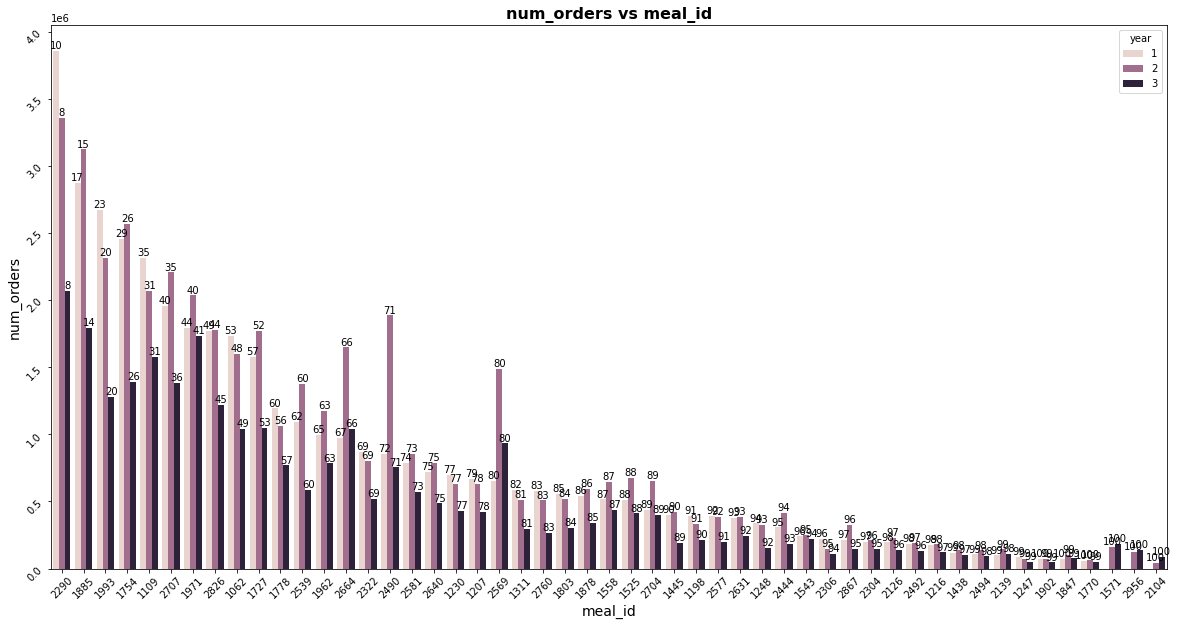

In [193]:
#meal_id
feature_target_summary_cum_year(food_orders_cp,'meal_id', plot=True)

A significant concentration is observed in a specific set of 21 meal IDs, which collectively contribute to 80% of the total orders. This suggests that these number of meal IDs play a crucial role in driving a substantial portion of the overall order volume.

#### 3-2 The Most Popular Centers

,center_id,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,13,1,1441312,3.557761,3.557761
1,43,1,1301756,3.213278,6.771039
2,10,1,1130812,2.791317,9.562356
3,137,1,1065594,2.630332,12.192688
4,174,1,968152,2.389804,14.582492
...,...,...,...,...,...
226,162,3,157387,0.573749,98.185375
227,149,3,142124,0.518108,98.703483
228,74,3,128699,0.469168,99.172651
229,41,3,121255,0.442031,99.614682


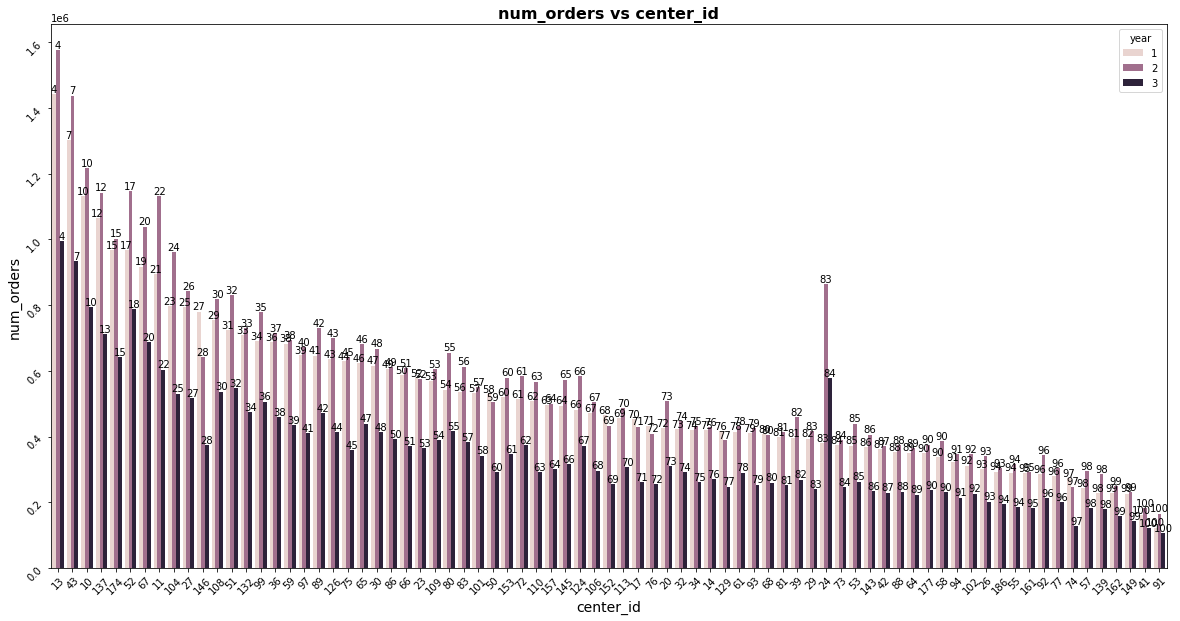

In [194]:
#center_id
feature_target_summary_cum_year(food_orders_cp,'center_id', plot=True)

The distribution of orders by center for each year reveals a dispersed pattern, with no significant concentration in a small number of centers. Approximately 66% of the centers collectively contribute to 80% of the total number of orders.

#### 3-3 Weeks

,week_year,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,48,1,1303457,3.136433,3.136433
1,5,1,1198675,2.884302,6.020734
2,52,1,1046811,2.518880,8.539615
3,32,1,1034202,2.488540,11.028155
4,45,1,981199,2.361002,13.389157
...,...,...,...,...,...
130,14,3,777707,2.917491,88.579777
131,31,3,777106,2.915237,91.495013
132,23,3,762737,2.861333,94.356346
133,16,3,753871,2.828073,97.184419


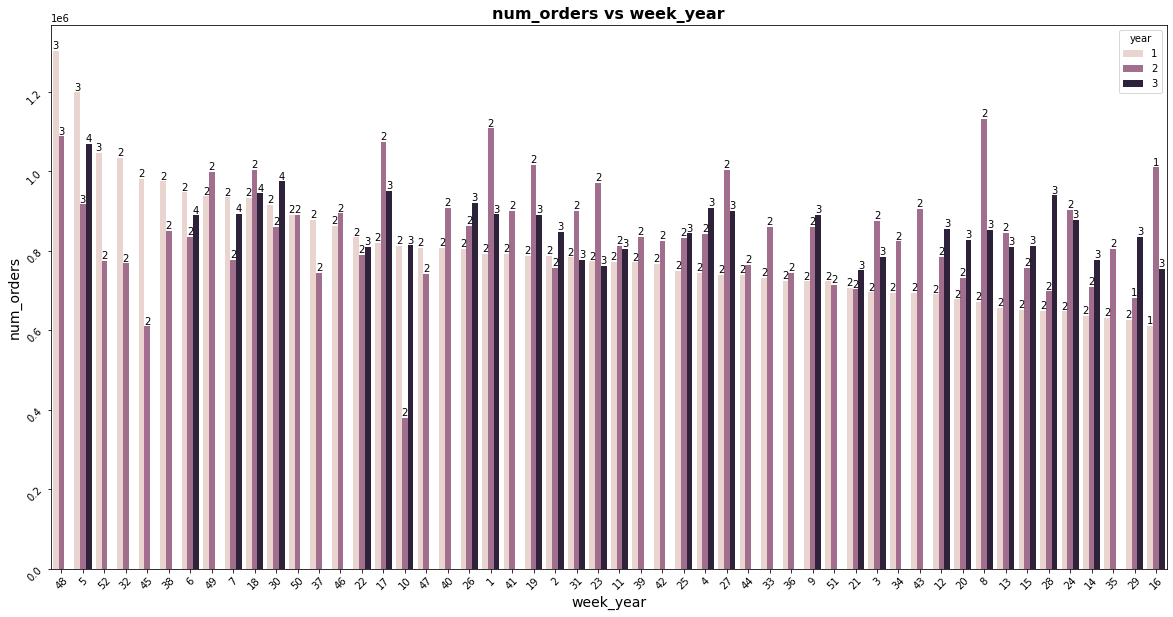

In [233]:
feature_target_summary_year(food_orders_cp,'week_year', plot=True)

Week 48 and Week 5 have a particularly high number of orders, ranking first and second, respectively, which may be indicative of promotional activities or special events that drive increased customer engagement and order volumes. 


- ### What is the impact of email promotions and homepage features on order quantities

#### 3-4 Emailer for Promotion and Homepage Featured

In [19]:
emailPromotion_data=food_orders.groupby('emailer_for_promotion')['num_orders'].sum().sort_values(ascending=False).reset_index()
emailPromotion_data

,emailer_for_promotion,num_orders
0,0,96175321
1,1,23382164


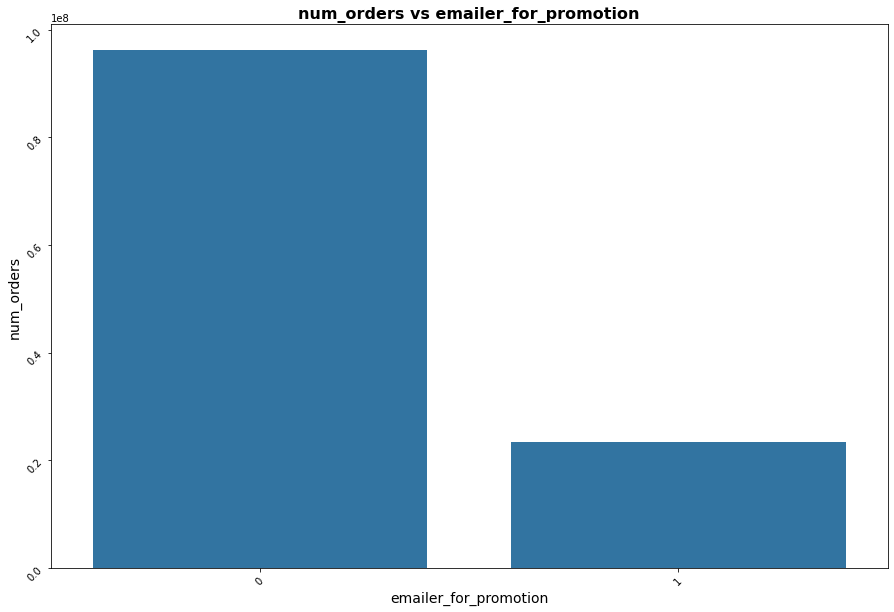

In [20]:
barplot(emailPromotion_data, 'emailer_for_promotion')

In [21]:
homepageFeatured_data=food_orders.groupby('homepage_featured')['num_orders'].sum().sort_values(ascending=False).reset_index()
homepageFeatured_data

,homepage_featured,num_orders
0,0,89899504
1,1,29657981


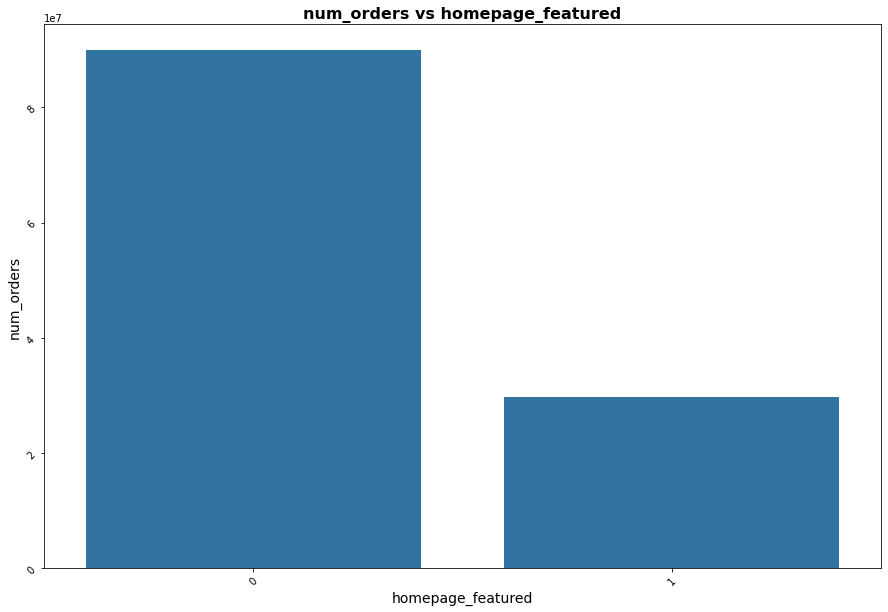

In [22]:
barplot(homepageFeatured_data, 'homepage_featured')

However, it appears that while promotional emails and homepage features might lead to a lower number of orders compared to scenarios where these promotional features are not utilized, further investigation is needed into the effectiveness and impact of promotions on actual order volumes. It's important to compare meals and centers with and without promotions separately.

- ### How do different regions and cities contribute to overall order volume?

#### 3-5 Popular Cities

,city_code,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,590,1,6598637,16.288196,16.288196
1,526,1,3258435,8.043180,24.331376
2,638,1,2156286,5.322616,29.653992
3,604,1,1159517,2.862173,32.516165
4,517,1,1139801,2.813506,35.329671
...,...,...,...,...,...
148,541,3,182270,0.664459,97.692731
149,658,3,182120,0.663912,98.356643
150,693,3,179972,0.656082,99.012724
151,478,3,142124,0.518108,99.530832


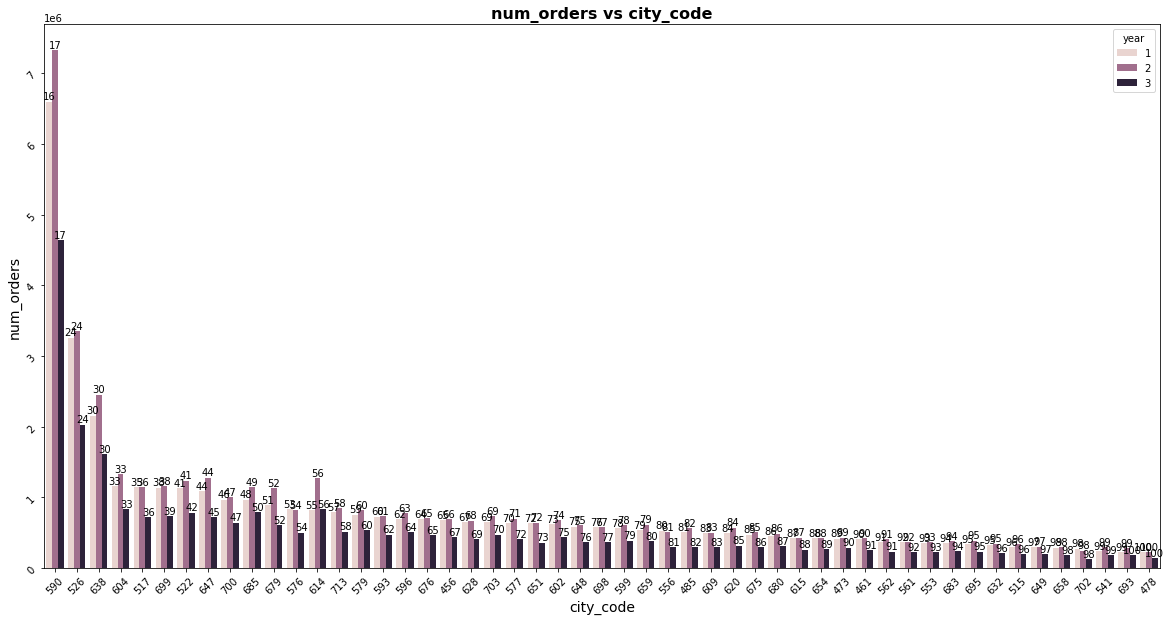

In [195]:
feature_target_summary_cum_year(food_orders_cp,'city_code', plot=True)

Three cities contribute nearly 30% of the total orders, while 80% of orders are spread across 57% of cities.

#### 3-6 Region Code

,region_code,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,56,1,20161724,49.767568,49.767568
1,34,1,8432785,20.815640,70.583208
2,77,1,7133569,17.608632,88.191840
3,85,1,2747512,6.782009,94.973849
4,71,1,691035,1.705763,96.679612
5,23,1,577297,1.425010,98.104623
6,93,1,494667,1.221045,99.325668
7,35,1,273184,0.674332,100.000000
8,56,2,22395110,50.720358,50.720358
9,34,2,8756400,19.831461,70.551819


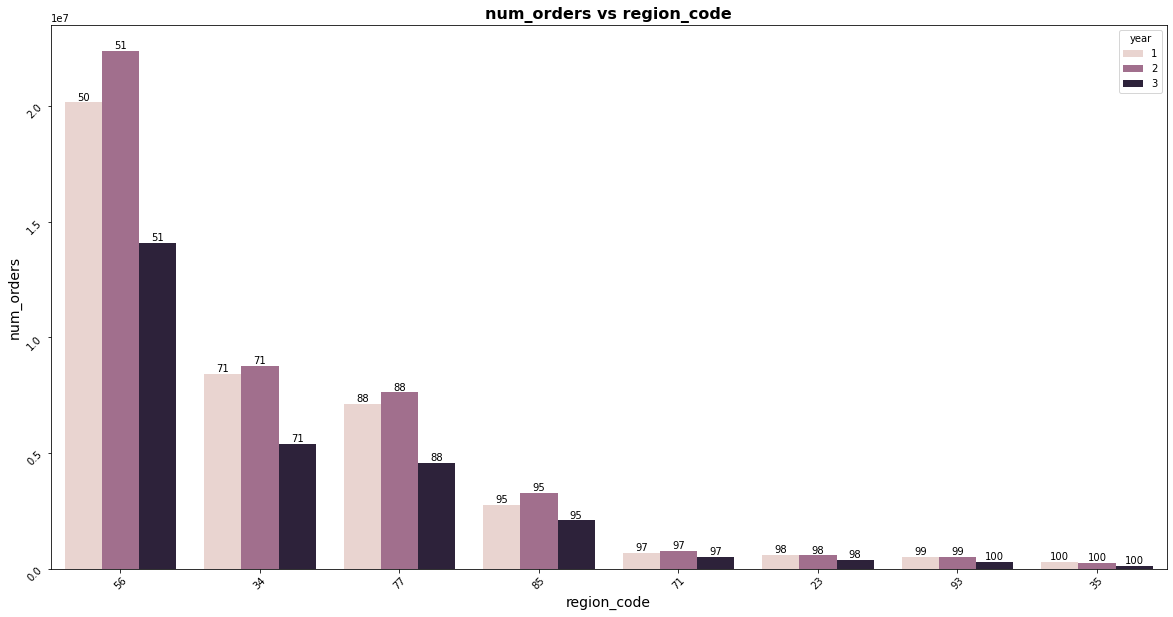

In [196]:
feature_target_summary_cum_year(food_orders_cp,'region_code', plot=True)

Three regions with codes 56, 34, and 77 contain 88% of the total number of orders. This highlights the significance of these regions compared to others.

- ### Are there any significant differences in ordering behavior based on the type of center ?

#### 3-7 Center Type

,center_type,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,TYPE_A,1,23648197,58.373641,58.373641
1,TYPE_B,1,10002740,24.690946,83.064587
2,TYPE_C,1,6860836,16.935413,100.000000
3,TYPE_A,2,25465734,57.674695,57.674695
4,TYPE_B,2,10996733,24.905358,82.580053
5,TYPE_C,2,7691618,17.419947,100.000000
6,TYPE_A,3,15660874,57.091159,57.091159
7,TYPE_B,3,6992335,25.490309,82.581468
8,TYPE_C,3,4778138,17.418532,100.000000


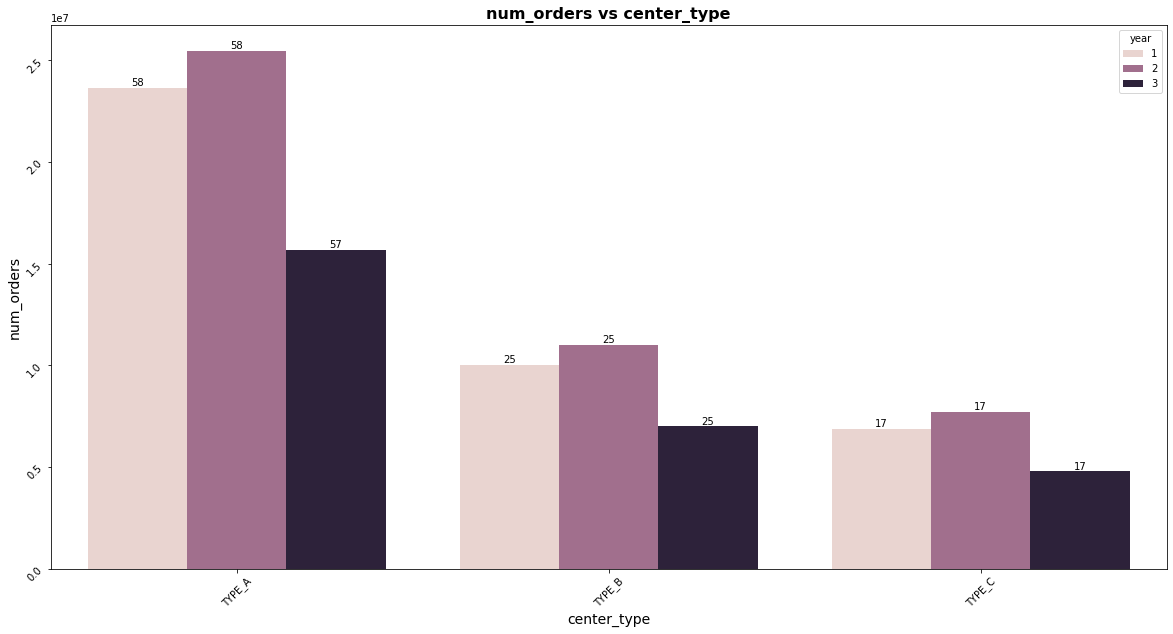

In [201]:
feature_target_summary_year(food_orders_cp,'center_type', plot=True)

58 percent of the number of orders belong to Center Type A.

- ### What are customers' ordering preferences in cuisine type, and meal category

#### 3-8 Meal Category

,meal_category,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,Beverages,1,14579405,35.988069,35.988069
1,Rice Bowl,1,7753761,19.139525,55.127595
2,Sandwich,1,6025107,14.872484,70.000079
3,Salad,1,2478104,6.116997,76.117076
4,Pizza,1,2299077,5.675084,81.792160
5,Starters,1,1652439,4.078911,85.871070
6,Extras,1,1538511,3.797689,89.668759
7,Other Snacks,1,1527910,3.771521,93.440280
8,Seafood,1,920281,2.271638,95.711918
9,Desert,1,623303,1.538573,97.250491


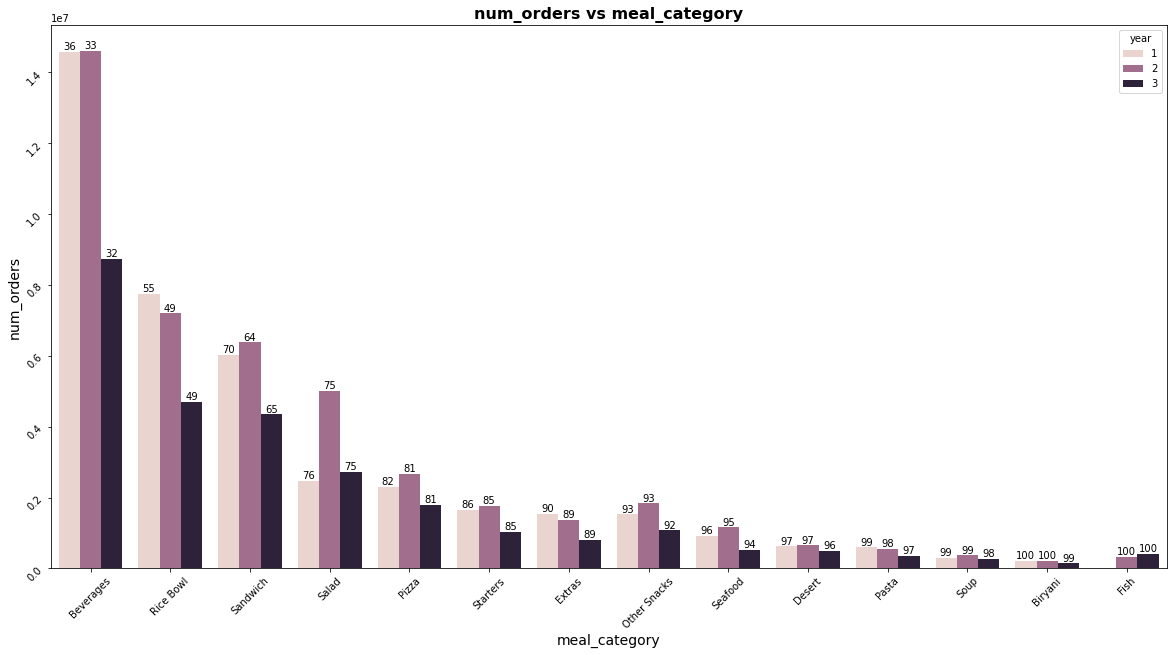

In [197]:
feature_target_summary_cum_year(food_orders_cp,'meal_category', plot=True)

Beverages, Rice Bowl, Sandwich, Salad, and Pizza account for more than 80% of orders among
other meal categories, with Beverages having the highest demand of more than 30%

#### 3-9 Cuisine

,cuisine,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,Italian,1,13991178,34.536079,34.536079
1,Thai,1,11653892,28.766680,63.302759
2,Indian,1,9412396,23.233730,86.536489
3,Continental,1,5454307,13.463511,100.000000
4,Italian,2,16841965,38.143617,38.143617
5,Thai,2,12163150,27.547055,65.690672
6,Indian,2,8921843,20.206155,85.896827
7,Continental,2,6227127,14.103173,100.000000
8,Italian,3,10639814,38.787064,38.787064
9,Thai,3,6852089,24.979047,63.766110


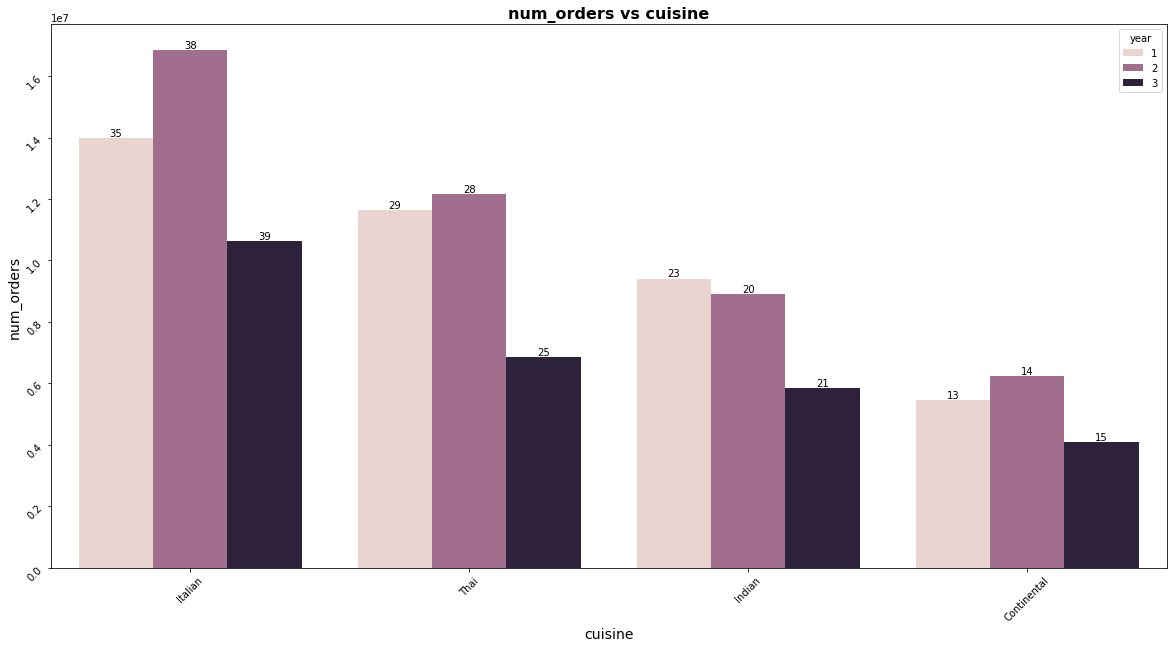

In [202]:
feature_target_summary_year(food_orders_cp,'cuisine', plot=True)

In [31]:
cuisine_data = food_orders.groupby('cuisine')['num_orders'].sum().sort_values(ascending=False).reset_index()
cuisine_data

,cuisine,num_orders
0,Italian,44172832
1,Thai,32677670
2,Indian,25792544
3,Continental,16914439


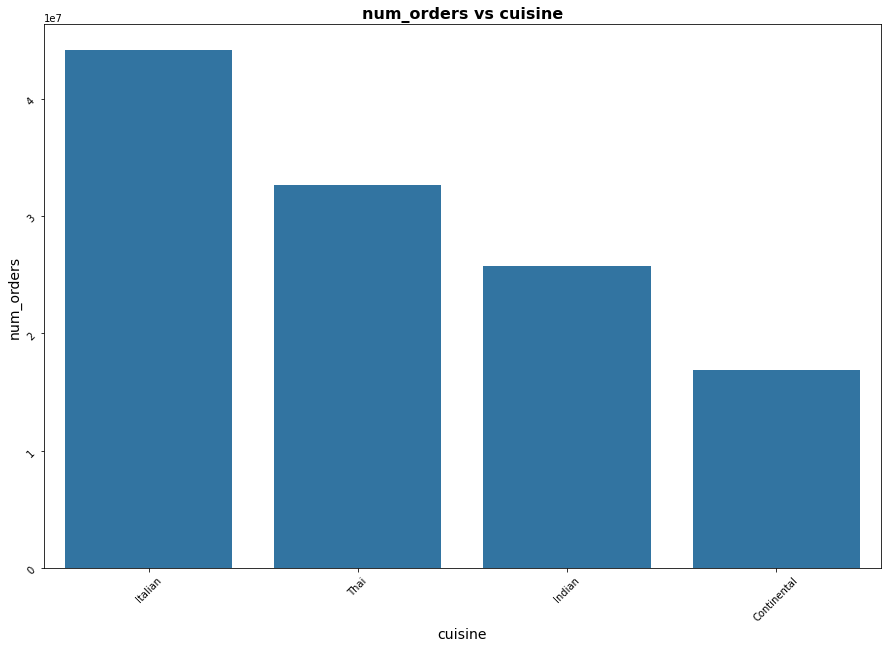

In [32]:
barplot(cuisine_data,'cuisine')

Based on the above figures, we can conclude that among the meal categories, beverages have the highest number of orders. Additionally, Italian cuisine and Type A centers also show a high number of orders.

- ### How do checkout prices compare to base prices?

#### 3-10 Checkout Price and Base Price

In [254]:
feature_target_summary_year(food_orders_cp,'checkout_price', plot=False)

,checkout_price,year,num_orders,Ratio_Perc_year,Ratio_Perc_year_cum
0,282.33,1,462826,1.142448,1.142448
1,281.33,1,459014,1.133039,2.275487
2,280.33,1,452868,1.117868,3.393354
3,244.50,1,451798,1.115226,4.508581
4,242.50,1,432172,1.066781,5.575362
...,...,...,...,...,...
5286,518.98,3,15,0.000055,99.999796
5287,580.06,3,15,0.000055,99.999851
5288,541.26,3,14,0.000051,99.999902
5289,702.28,3,14,0.000051,99.999953


In [48]:
checkoutPrice = food_orders.groupby('checkout_price')['num_orders'].sum().sort_values(ascending=False).reset_index()
checkoutPrice

,checkout_price,num_orders
0,291.03,1231247
1,290.03,1231150
2,292.03,1227217
3,244.50,1055313
4,243.50,1051909
...,...,...
1976,738.23,15
1977,702.28,14
1978,2.97,14
1979,70.84,14


In [50]:
basetPrice = food_orders.groupby('base_price')['num_orders'].sum().sort_values(ascending=False).reset_index()
basetPrice

,base_price,num_orders
0,292.03,2156480
1,291.03,2123061
2,290.03,2107933
3,310.43,1869749
4,309.43,1817349
...,...,...
1878,739.14,40
1879,538.35,26
1880,537.41,26
1881,83.48,26


In [255]:
#Estimate the revenue base on check out price for each year
food_orders_cp['checkpriceTotal']=food_orders_cp['num_orders']*food_orders_cp['checkout_price']
food_orders_cp.groupby('year')['checkpriceTotal'].sum().sort_values(ascending=False).reset_index()

,year,checkpriceTotal
0,2,1.169928e+10
1,1,1.046037e+10
2,3,7.594499e+09


In [78]:
#Estimate the total amount of the checkout price for each year
food_orders_cp.groupby('year')['checkout_price'].sum().sort_values(ascending=False).reset_index()

,year,checkout_price
0,2,55391862.34
1,1,49713713.01
2,3,35371012.60


In [256]:
#Estimate the costs based on base price for each year
food_orders_cp['basepriceTotal']=food_orders_cp['num_orders']*food_orders_cp['base_price']
food_orders_cp.groupby('year')['basepriceTotal'].sum().sort_values(ascending=False).reset_index()

,year,basepriceTotal
0,2,1.320895e+10
1,1,1.182607e+10
2,3,8.527869e+09


In [70]:
#Estimate the total amount of the base price for each year
food_orders_cp.groupby('year')['base_price'].sum().sort_values(ascending=False).reset_index()

,year,base_price
0,2,59032941.90
1,1,52953892.01
2,3,37899287.50


We explored the total base price and checkout price trends. The analysis revealed a growth in prices from year 1 to year 2, while year 3 experienced a decline due to fewer weeks. Notably, the base price exceeded the checkout price for both years.

- ### Are there any seasonal trends or patterns in meal orders?

#### Plotting Time Series:

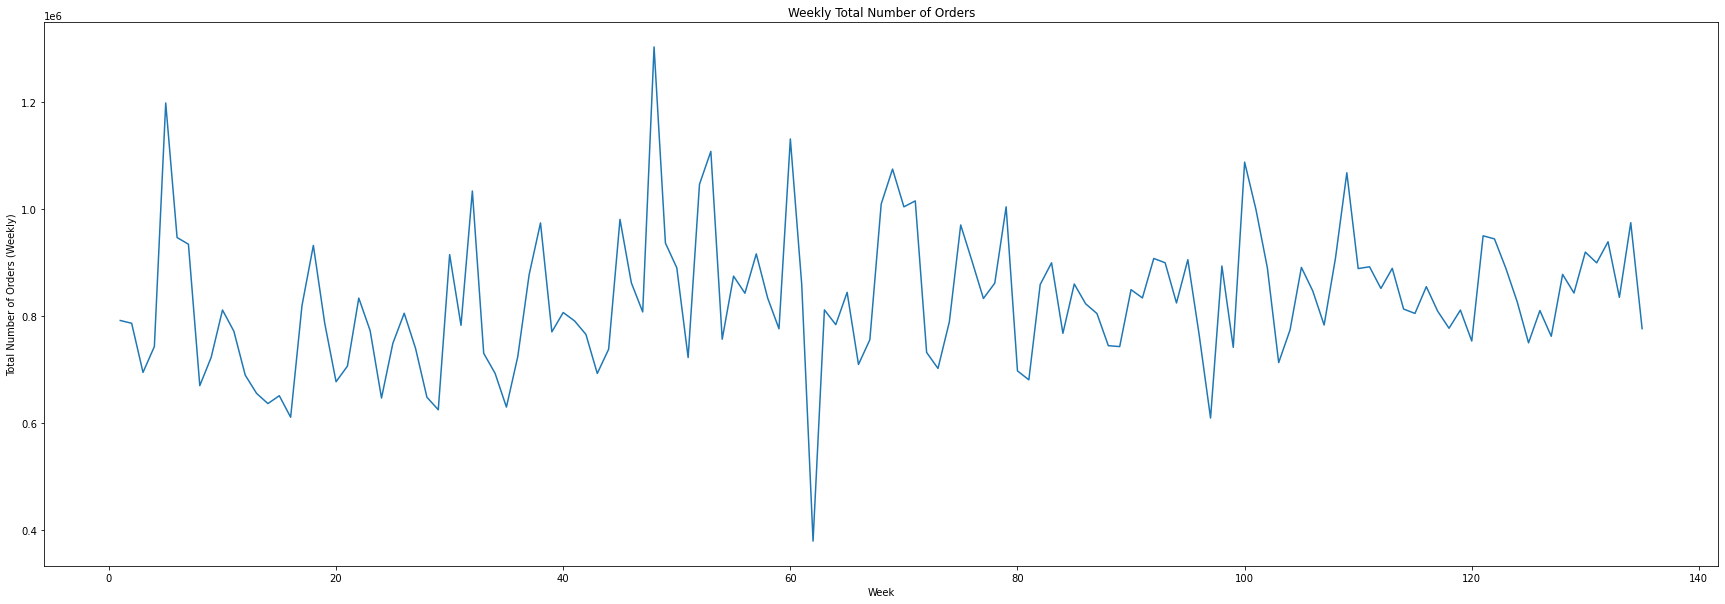

In [61]:
weekly_orders =food_orders_cp.groupby('week')['num_orders'].sum()

plt.figure(figsize=(30,10))
plt.plot(weekly_orders.index.to_numpy(), weekly_orders.values)
plt.xlabel('Week')
plt.ylabel('Total Number of Orders (Weekly)')
plt.title('Weekly Total Number of Orders')
plt.show()

#### Seasonal Decomposition

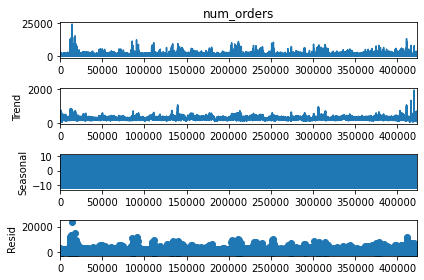

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(food_orders_cp['num_orders'], period=52)  # Assuming a seasonal period of 52 weeks
result.plot()
plt.show()

The data shows there is a consistent underlying pattern in the data with periodic variations. The trend indicates a baseline level of activity or behavior, while the fluctuations represent short-term deviations. The seasonal component indicates that the seasonal patterns occur regularly and have similar magnitudes across different periods. This interpretation implies that the data exhibits both long-term stability in trend and predictable seasonal patterns.

- ### How does the operational area (op_area) of fulfillment centers correlate with order quantities 

#### Scatterplots of numeric features against number of orders

In [33]:
features=[x for x in food_orders.columns if x not in ['id','num_orders']]

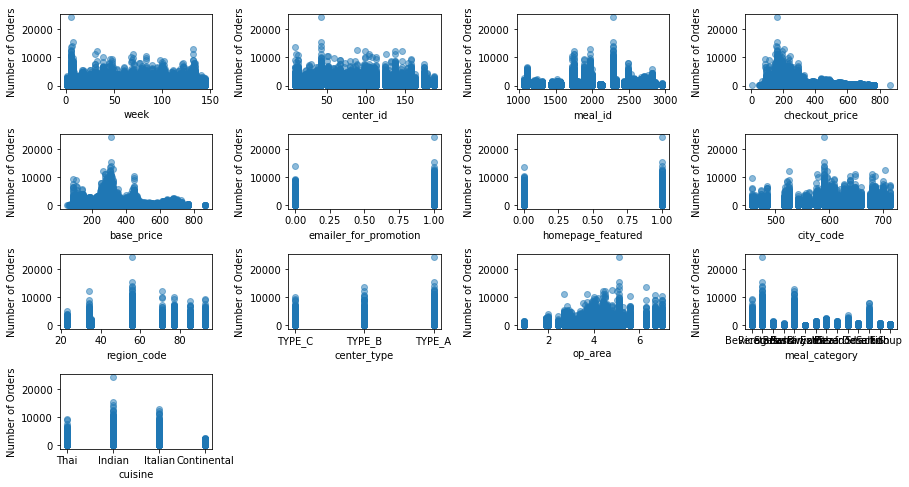

In [34]:
# create scatterplots of "Number of Orders" against desired features
ncol=4
nrow = int(np.ceil(len(features) / ncol))
fig, axes = plt.subplots(nrow, ncol, figsize=(15,8), squeeze=False)
fig.subplots_adjust(wspace=0.5, hspace=0.6)
for i, col in enumerate(features):
    ax = axes.flatten()[i]
    ax.scatter(x = col, y='num_orders', data=food_orders, alpha=0.5 )
    ax.set(xlabel=col, ylabel='Number of Orders')
   # ax.set_xticklabels(food_orders,rotation=45)
# Hide any remaining empty subplots
nsubplots = nrow * ncol    
for empty in range(i+1, nsubplots):
    axes.flatten()[empty].set_visible(False)

The plots show:
- There is a moderate negative correlation between the number of orders and the checkout price. This means that as the checkout price increases, the number of orders tends to decrease, and vice versa.
- There is a positive mild correlation between the number of orders and the operation area. This means that as the operation area increases, the number of orders tends to increase, although the correlation is not very strong.

### Visualize Relationships between Variables

#### Correlation Matrix

Use correlation matrix to see the relationship between variables.

<AxesSubplot:>

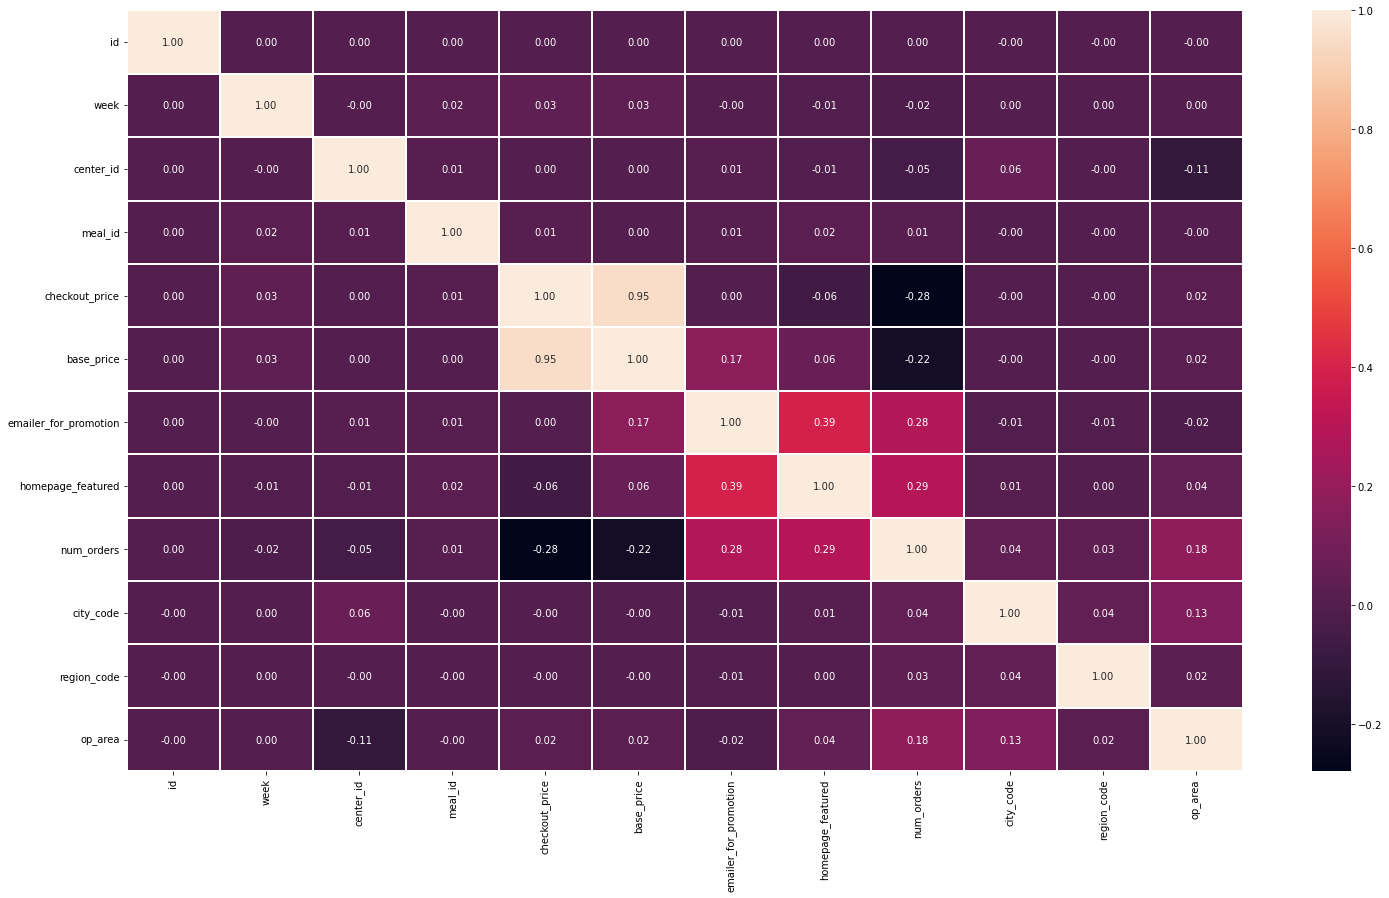

In [35]:
plt.figure(figsize=(25,14))
sns.heatmap(round(food_orders.select_dtypes('number').corr(),2), annot=True,fmt='.2f',linewidths=.05)

The correlation matrix shows the following relationships between variables:

  #### Strong Correlation
  - Base price and checkout price (0.95)

#### Moderate and Mild Correlation
- Email promotion and homepage promotion (0.39)
- Number of orders and op_area (0.18)

#### Moderate Negative Correlation
- Number of orders and checkout price(0.28)
- Number of orders and base price (0.22)

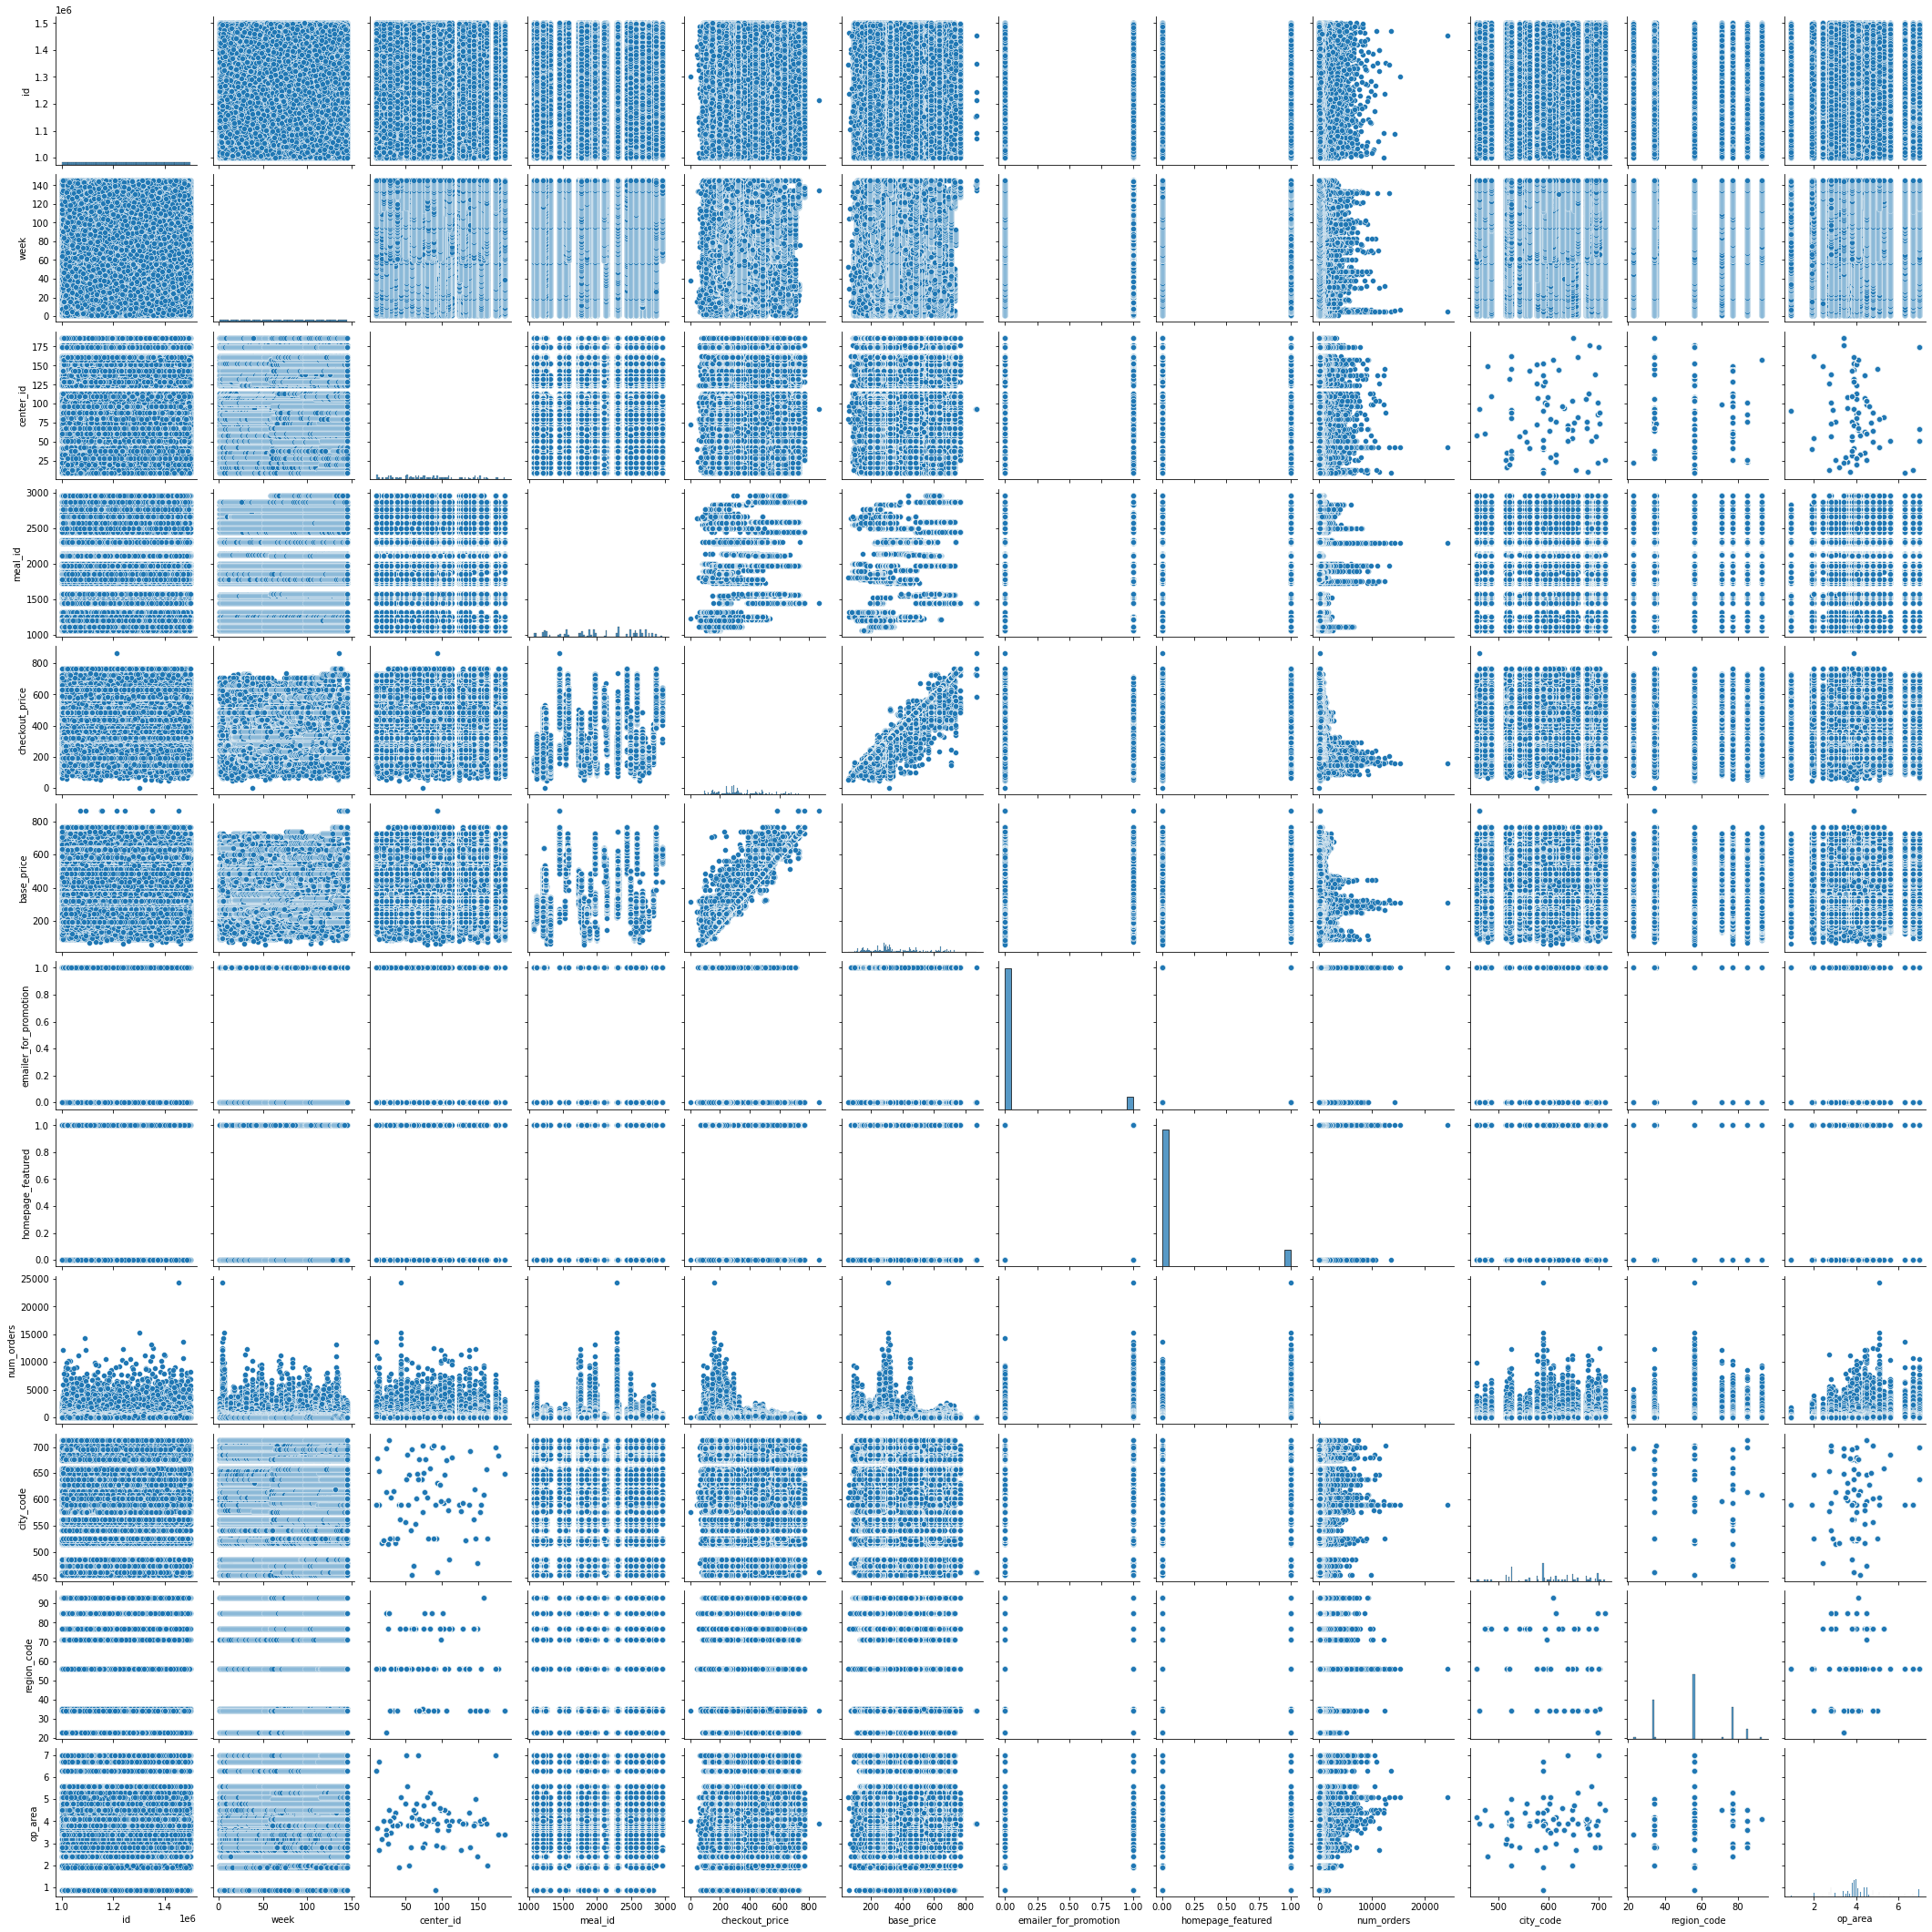

In [36]:
#Create a pairplot for all numeric variables
sns.pairplot(food_orders)
plt.show()

As mentioned in the previous section, the plot demonstrates a strong correlation between base and checkout prices.

### Summary

The total number of orders for each year was explored, with a focus on some features such as
meals, centers, and cuisines. By closely examining these elements, we can pinpoint those that
consistently contribute the most significant share of orders. This insight is crucial for refining our
models and allocating resources effectively, as it directs our attention to key features that have a
substantial impact on the overall order distribution. Furthermore, understanding the cumulative importance of these specific elements provides a foundation for strategic decision-making and targeted improvements in the forecasting and planning processes.

The feature correlations reveal a strong association between Base price and Checkout price, as well as a moderate correlation between email promotion and homepage promotion. Furthermore, there is a negative moderate correlation between the number of orders and base price, and checkout price, along with a positive mild correlation with the operation area, which is coherent.

Additionally, substantial fluctuations are observed across different weeks, with variations evident across years. This suggests the presence of seasonal patterns, special events, or promotions influencing customer behavior.